# 分類決策樹實作

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import sklearn 一個我們在學機器學習最常用的一個套件 之中的 datasets
from sklearn import datasets

In [3]:
#sklearn裡面的iris資料
iris=datasets.load_iris()

In [36]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
x = pd.DataFrame(iris["data"],columns = iris["feature_names"])
print(x)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [8]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
y = pd.DataFrame(iris["target"],columns=["target"])

In [11]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [12]:
iris_data=pd.concat([x,y],axis=1)

In [13]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
from sklearn.model_selection import train_test_split

In [427]:
X_train,X_test,Y_train,Y_test = train_test_split(iris_data[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]],iris_data[["target"]],test_size=0.3)

In [16]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
116,6.5,3.0,5.5,1.8
68,6.2,2.2,4.5,1.5
63,6.1,2.9,4.7,1.4
88,5.6,3.0,4.1,1.3
27,5.2,3.5,1.5,0.2
...,...,...,...,...
39,5.1,3.4,1.5,0.2
9,4.9,3.1,1.5,0.1
78,6.0,2.9,4.5,1.5
129,7.2,3.0,5.8,1.6


In [17]:
Y_train

,target
116,2
68,1
63,1
88,1
27,0
...,...
39,0
9,0
78,1
129,2


# 資料終於準備好了，要來做分類決策樹了！

Parameters:

<br>
criterion: 亂度的評估標準，gini/entropy。預設為gini。<br>
max_depth: 樹的最大深度。<br>
splitter: 特徵劃分點選擇標準，best/random。預設為best。<br>
random_state: 亂數種子，確保每次訓練結果都一樣，splitter=random 才有用。<br>
min_samples_split: 至少有多少資料才能再分<br>
min_samples_leaf: 分完至少有多少資料才能分<br>

Attributes:<br>

featureimportances: 查詢模型特徵的重要程度。<br>

Methods:<br>

fit: 放入X、y進行模型擬合。<br>
predict: 預測並回傳預測類別。<br>
score: 預測成功的比例。<br>
predict_proba: 預測每個類別的機率值。<br>
get_depth: 取得樹的深度。<br>

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
tree_ex = DecisionTreeClassifier()

In [20]:
tree_ex.fit(X_train,Y_train)

DecisionTreeClassifier()

In [21]:
tree_ex.predict(X_test)

array([0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2,
       0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 1, 0,
       2])

In [22]:
Y_test["target"].values

array([0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2,
       0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 1, 0,
       2])

In [23]:
tree_ex.score(X_test,Y_test["target"])

0.9555555555555556

In [41]:
x=[[1,1,1,1]]
tree_ex.predict(x)

array([0])

# 視覺化你的tree

In [26]:
from sklearn import tree

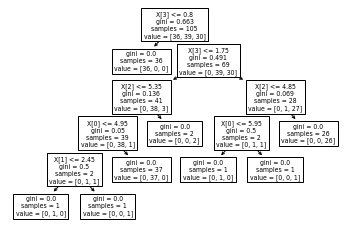

In [28]:
tree.plot_tree(tree_ex);

In [29]:
X_test.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

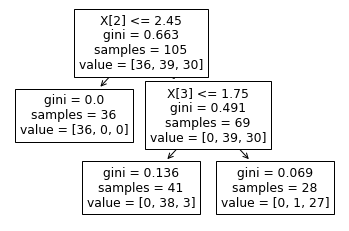

In [31]:
# 分支太多了?改一下程式碼
tree_ex = DecisionTreeClassifier(max_depth=2)
tree_ex.fit(X_train,Y_train)
tree.plot_tree(tree_ex);

In [32]:
tree_ex.score(X_test,Y_test["target"])

0.9555555555555556

## Q1:用 balance_scale.data自己做一個分類決策樹!(Y=Class Name,其餘為X)

In [33]:
col = [ 'Class Name','Left weight','Left distance','Right weight','Right distance']
df = pd.read_csv('balance-scale.data',names=col,sep=',')
df.head()

,Class Name,Left weight,Left distance,Right weight,Right distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


# 迴歸決策數實作

## 先試試模擬資料

## 線性資料

In [461]:
e = np.random.randn(1000, 1)
x = np.random.randn(1000, 1)
y = 15+10*x + e

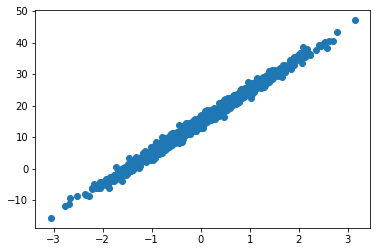

In [462]:
plt.scatter(x,y)

In [463]:
X = pd.DataFrame(x,columns = ["x"])

In [464]:
Y = pd.DataFrame(y,columns=["y"])

In [465]:
reg_data= pd.concat([X,Y],axis=1)

In [466]:
reg_data

,x,y
0,0.935827,24.594465
1,-0.919875,8.503641
2,-0.689709,8.777584
3,0.421985,19.214718
4,0.622405,21.168470
...,...,...
995,0.452102,18.520531
996,1.339736,26.700352
997,0.446317,19.988796
998,-0.426085,8.526681


In [467]:
X_train,X_test,Y_train,Y_test = train_test_split(reg_data[["x"]],reg_data[["y"]],test_size=0.3)

Parameters:<br>

criterion: 評估切割點指標，mse/friedman_mse/mae。<br>
max_depth: 樹的最大深度。<br>
splitter: 特徵劃分點選擇標準，best/random。預設為best。<br>
random_state: 亂數種子，確保每次訓練結果都一樣，splitter=random 才有用。<br>
min_samples_split: 至少有多少資料才能再分<br>
min_samples_leaf: 分完至少有多少資料才能分<br>
Attributes:<br>

featureimportances: 查詢模型特徵的重要程度。<br>

Methods:<br>

fit: 放入X、y進行模型擬合。<br>
predict: 預測並回傳預測類別。<br>
score: 預測成功的比例。<br>
get_depth: 取得樹的深度。<br>

In [468]:
from sklearn.tree import DecisionTreeRegressor

In [469]:
tree_ex = DecisionTreeRegressor(max_depth=3)

In [470]:
tree_ex.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=3)

In [471]:
predicted = tree_ex.predict(X_test)
print(predicted)

[36.28456337  8.38560626 17.91187724 17.91187724 36.28456337 13.21934709
 23.09054298  8.38560626  2.85975074  8.38560626 13.21934709  8.38560626
 17.91187724 23.09054298  8.38560626 17.91187724 13.21934709  8.38560626
 13.21934709 13.21934709 17.91187724  2.85975074  8.38560626  2.85975074
  2.85975074 17.91187724  8.38560626  2.85975074 13.21934709 17.91187724
 36.28456337 17.91187724 23.09054298  8.38560626 13.21934709 17.91187724
 -3.82713536  8.38560626 17.91187724 17.91187724 -3.82713536 23.09054298
 23.09054298 13.21934709  2.85975074 13.21934709  8.38560626  8.38560626
  2.85975074 23.09054298 13.21934709 23.09054298 23.09054298 17.91187724
  8.38560626 17.91187724 13.21934709  2.85975074  8.38560626 13.21934709
 -3.82713536 13.21934709 17.91187724 23.09054298 17.91187724 23.09054298
 13.21934709 36.28456337 13.21934709 -3.82713536 23.09054298  8.38560626
 23.09054298 23.09054298  2.85975074  2.85975074 17.91187724 28.88696747
  8.38560626 23.09054298 17.91187724 17.91187724 17

In [472]:
#R^2
tree_ex.score(X_test,Y_test["y"])

0.9538415445429049

In [473]:
tree_ex.get_depth()

3

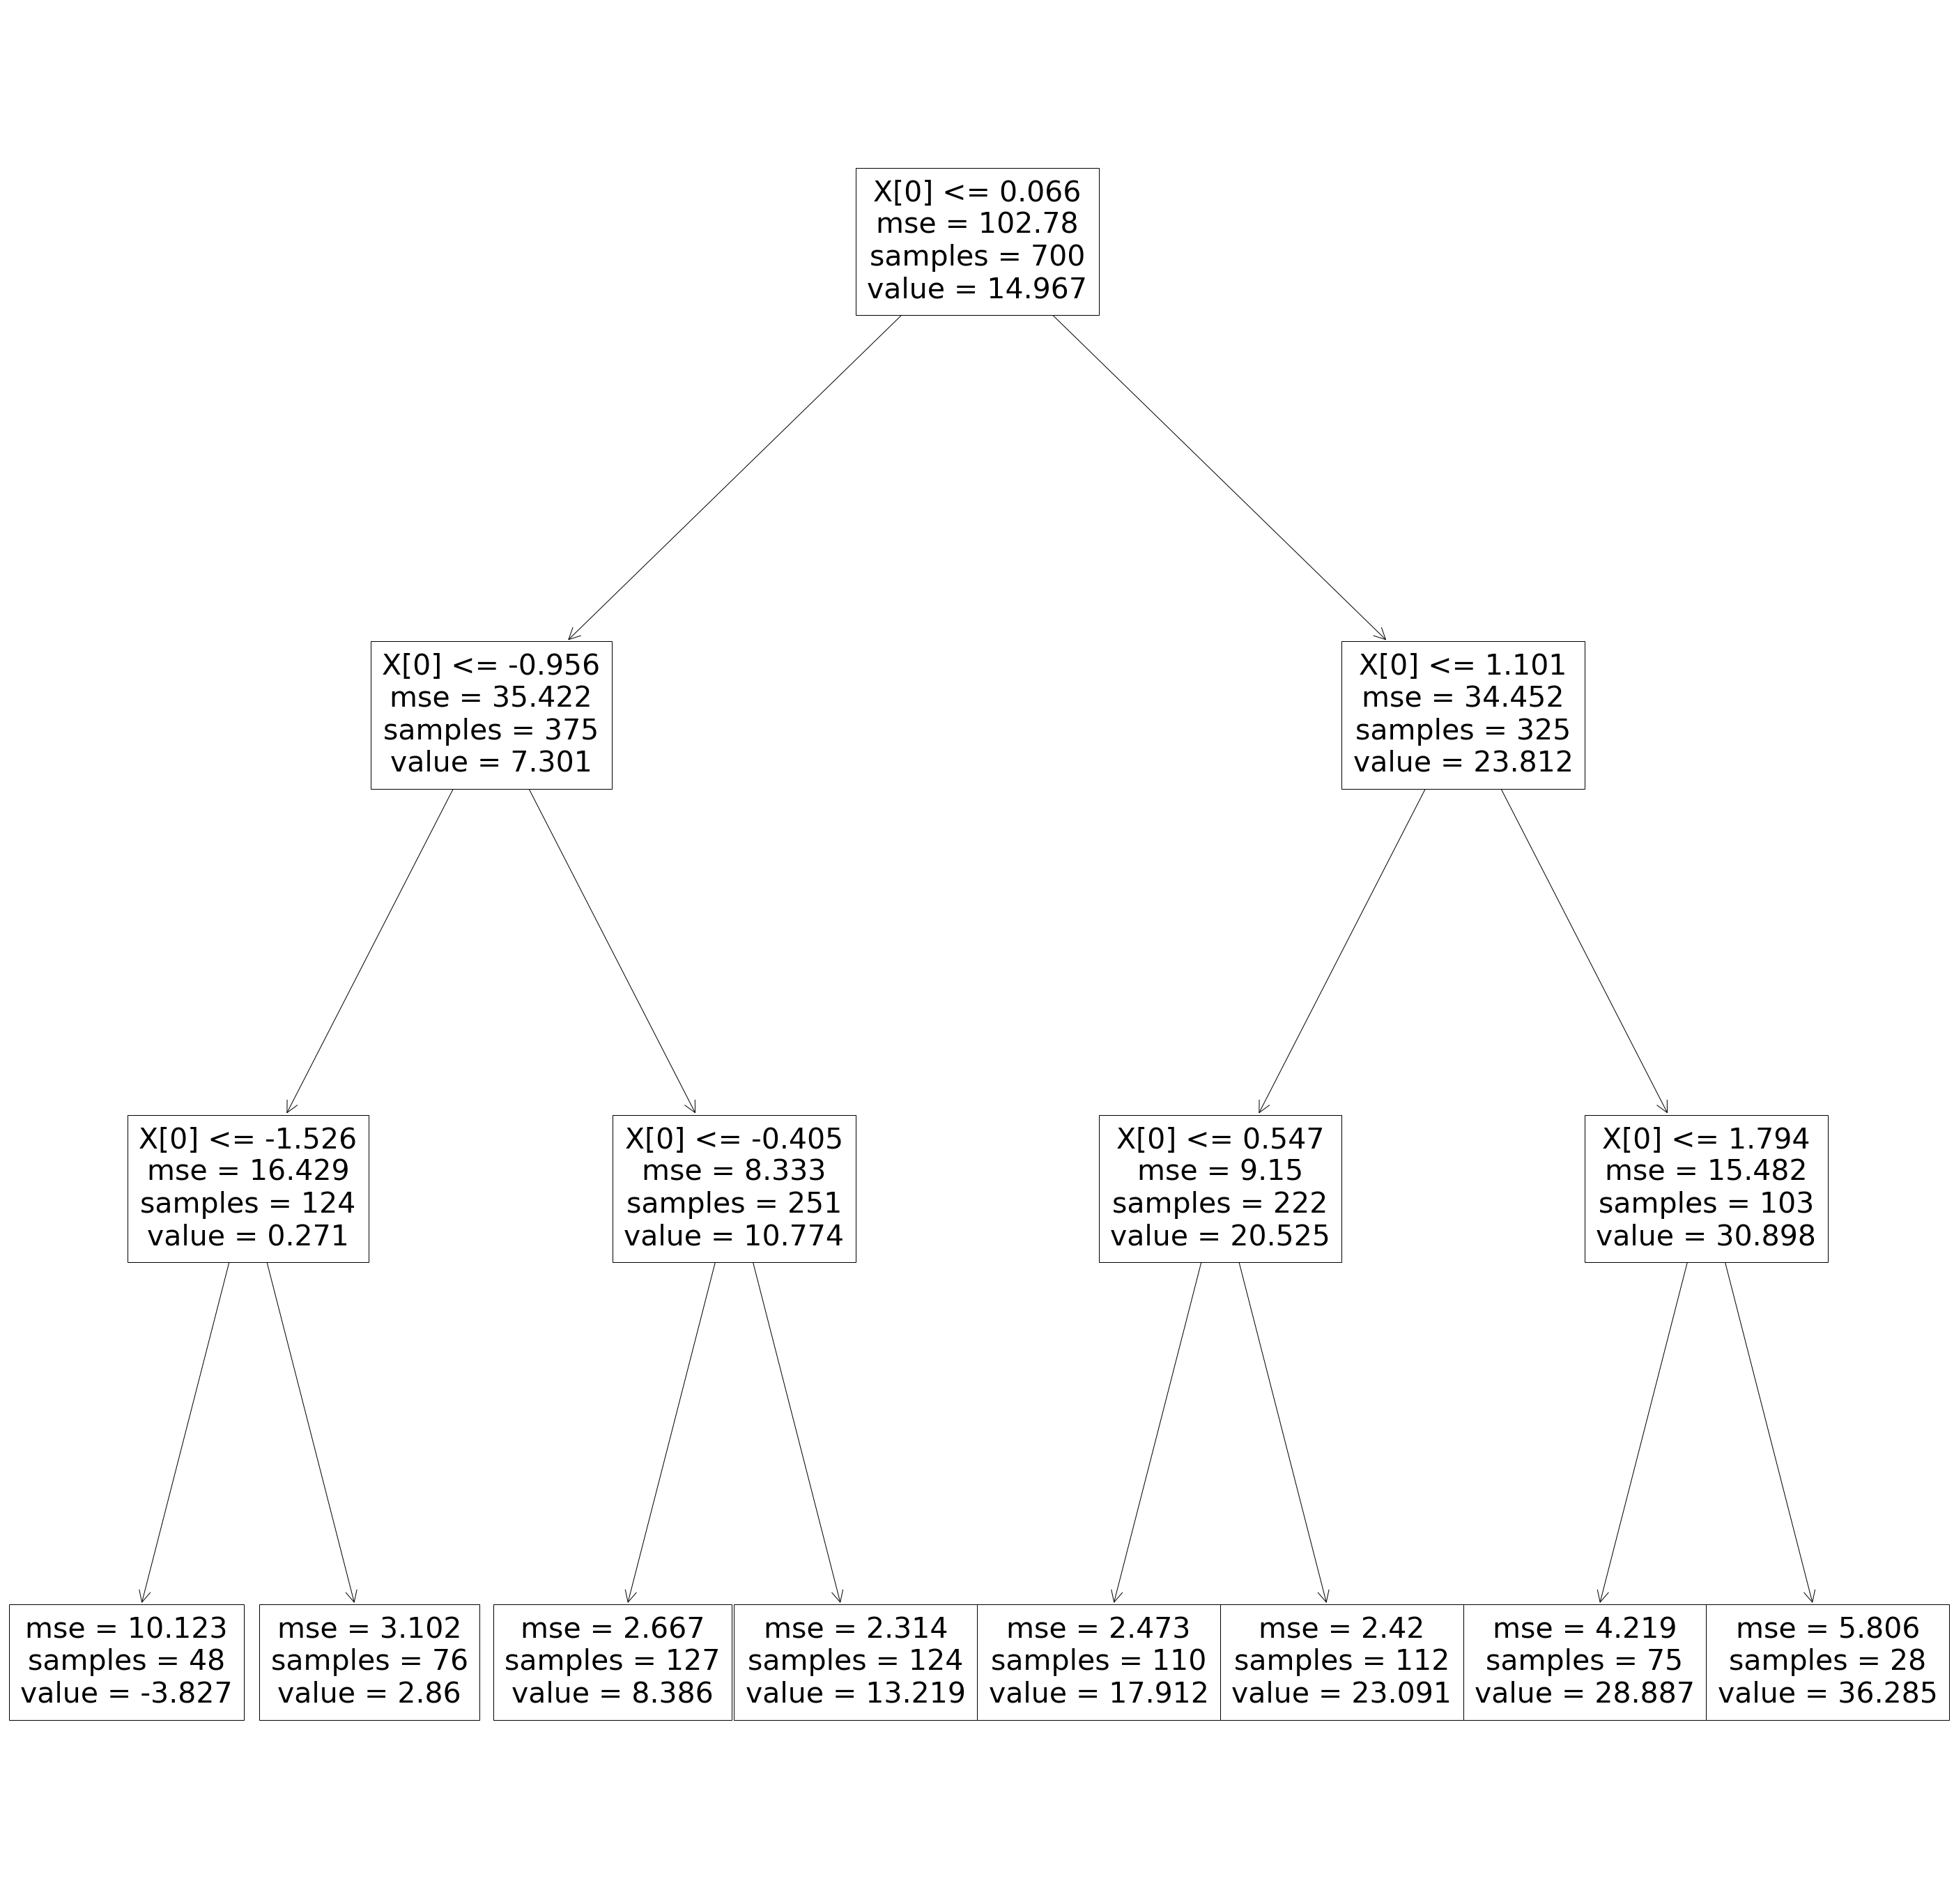

In [474]:
plt.figure(figsize=(50,50))
tree.plot_tree(tree_ex);
plt.show()

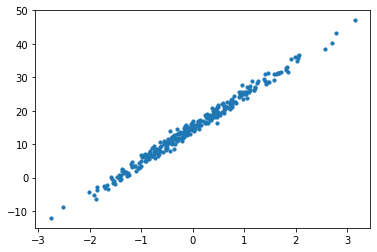

In [475]:
plt.scatter(X_test, Y_test, s=10, label='True')

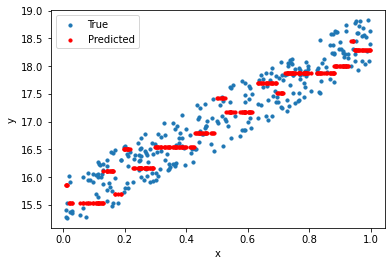

In [359]:
plt.scatter(X_test, Y_test, s=10, label='True')
plt.scatter(X_test, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 非線性資料

In [449]:
x = np.random.rand(1000,1)
e = np.random.rand(1000,1)
y = 20+5*x**2+e

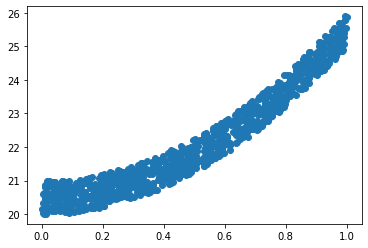

In [450]:
plt.scatter(x,y)

In [451]:
X = pd.DataFrame(x,columns=["x"])

In [452]:
Y = pd.DataFrame(y,columns=["y"])

In [453]:
reg_data = pd.concat([X,Y],axis=1)

In [454]:
reg_data

,x,y
0,0.088080,20.734139
1,0.851875,24.258802
2,0.687078,22.647010
3,0.251390,21.314492
4,0.595527,22.715344
...,...,...
995,0.331098,21.092806
996,0.869507,24.632061
997,0.898080,24.705943
998,0.637072,22.110903


In [455]:
X_train,X_test,Y_train,Y_test = train_test_split(reg_data[["x"]],reg_data[["y"]],test_size=0.3)

In [456]:
tree_ex = DecisionTreeRegressor(max_depth=3)
tree_ex.fit(X_train, Y_train)
predicted = tree_ex.predict(X_test)
print(predicted)

[24.37644403 22.03451265 20.58421716 21.49468806 24.37644403 20.58421716
 24.37644403 22.03451265 21.49468806 20.58421716 20.58421716 22.03451265
 20.58421716 22.03451265 20.58421716 20.58421716 20.58421716 23.43083494
 20.58421716 24.37644403 23.43083494 20.58421716 20.58421716 21.49468806
 20.58421716 20.99416935 25.17909655 22.7094725  22.7094725  20.58421716
 24.37644403 20.58421716 20.58421716 20.58421716 20.99416935 20.58421716
 20.99416935 23.43083494 20.58421716 22.03451265 20.58421716 21.49468806
 20.99416935 22.7094725  20.99416935 22.7094725  22.03451265 20.58421716
 21.49468806 20.99416935 22.03451265 23.43083494 20.99416935 22.7094725
 21.49468806 25.17909655 22.03451265 20.99416935 21.49468806 20.58421716
 20.58421716 25.17909655 22.7094725  20.58421716 20.58421716 25.17909655
 25.17909655 20.99416935 20.58421716 20.58421716 20.58421716 24.37644403
 20.58421716 20.58421716 25.17909655 25.17909655 20.58421716 20.58421716
 21.49468806 20.99416935 25.17909655 24.37644403 24.

In [457]:
print(Y_test)

             y
623  24.018233
126  21.860887
796  20.892418
461  21.599965
151  24.341353
..         ...
878  22.476413
645  20.841608
876  20.188939
630  22.568594
998  22.110903

[300 rows x 1 columns]


In [458]:
tree_ex.score(X_test,Y_test["y"])

0.9528607697176033

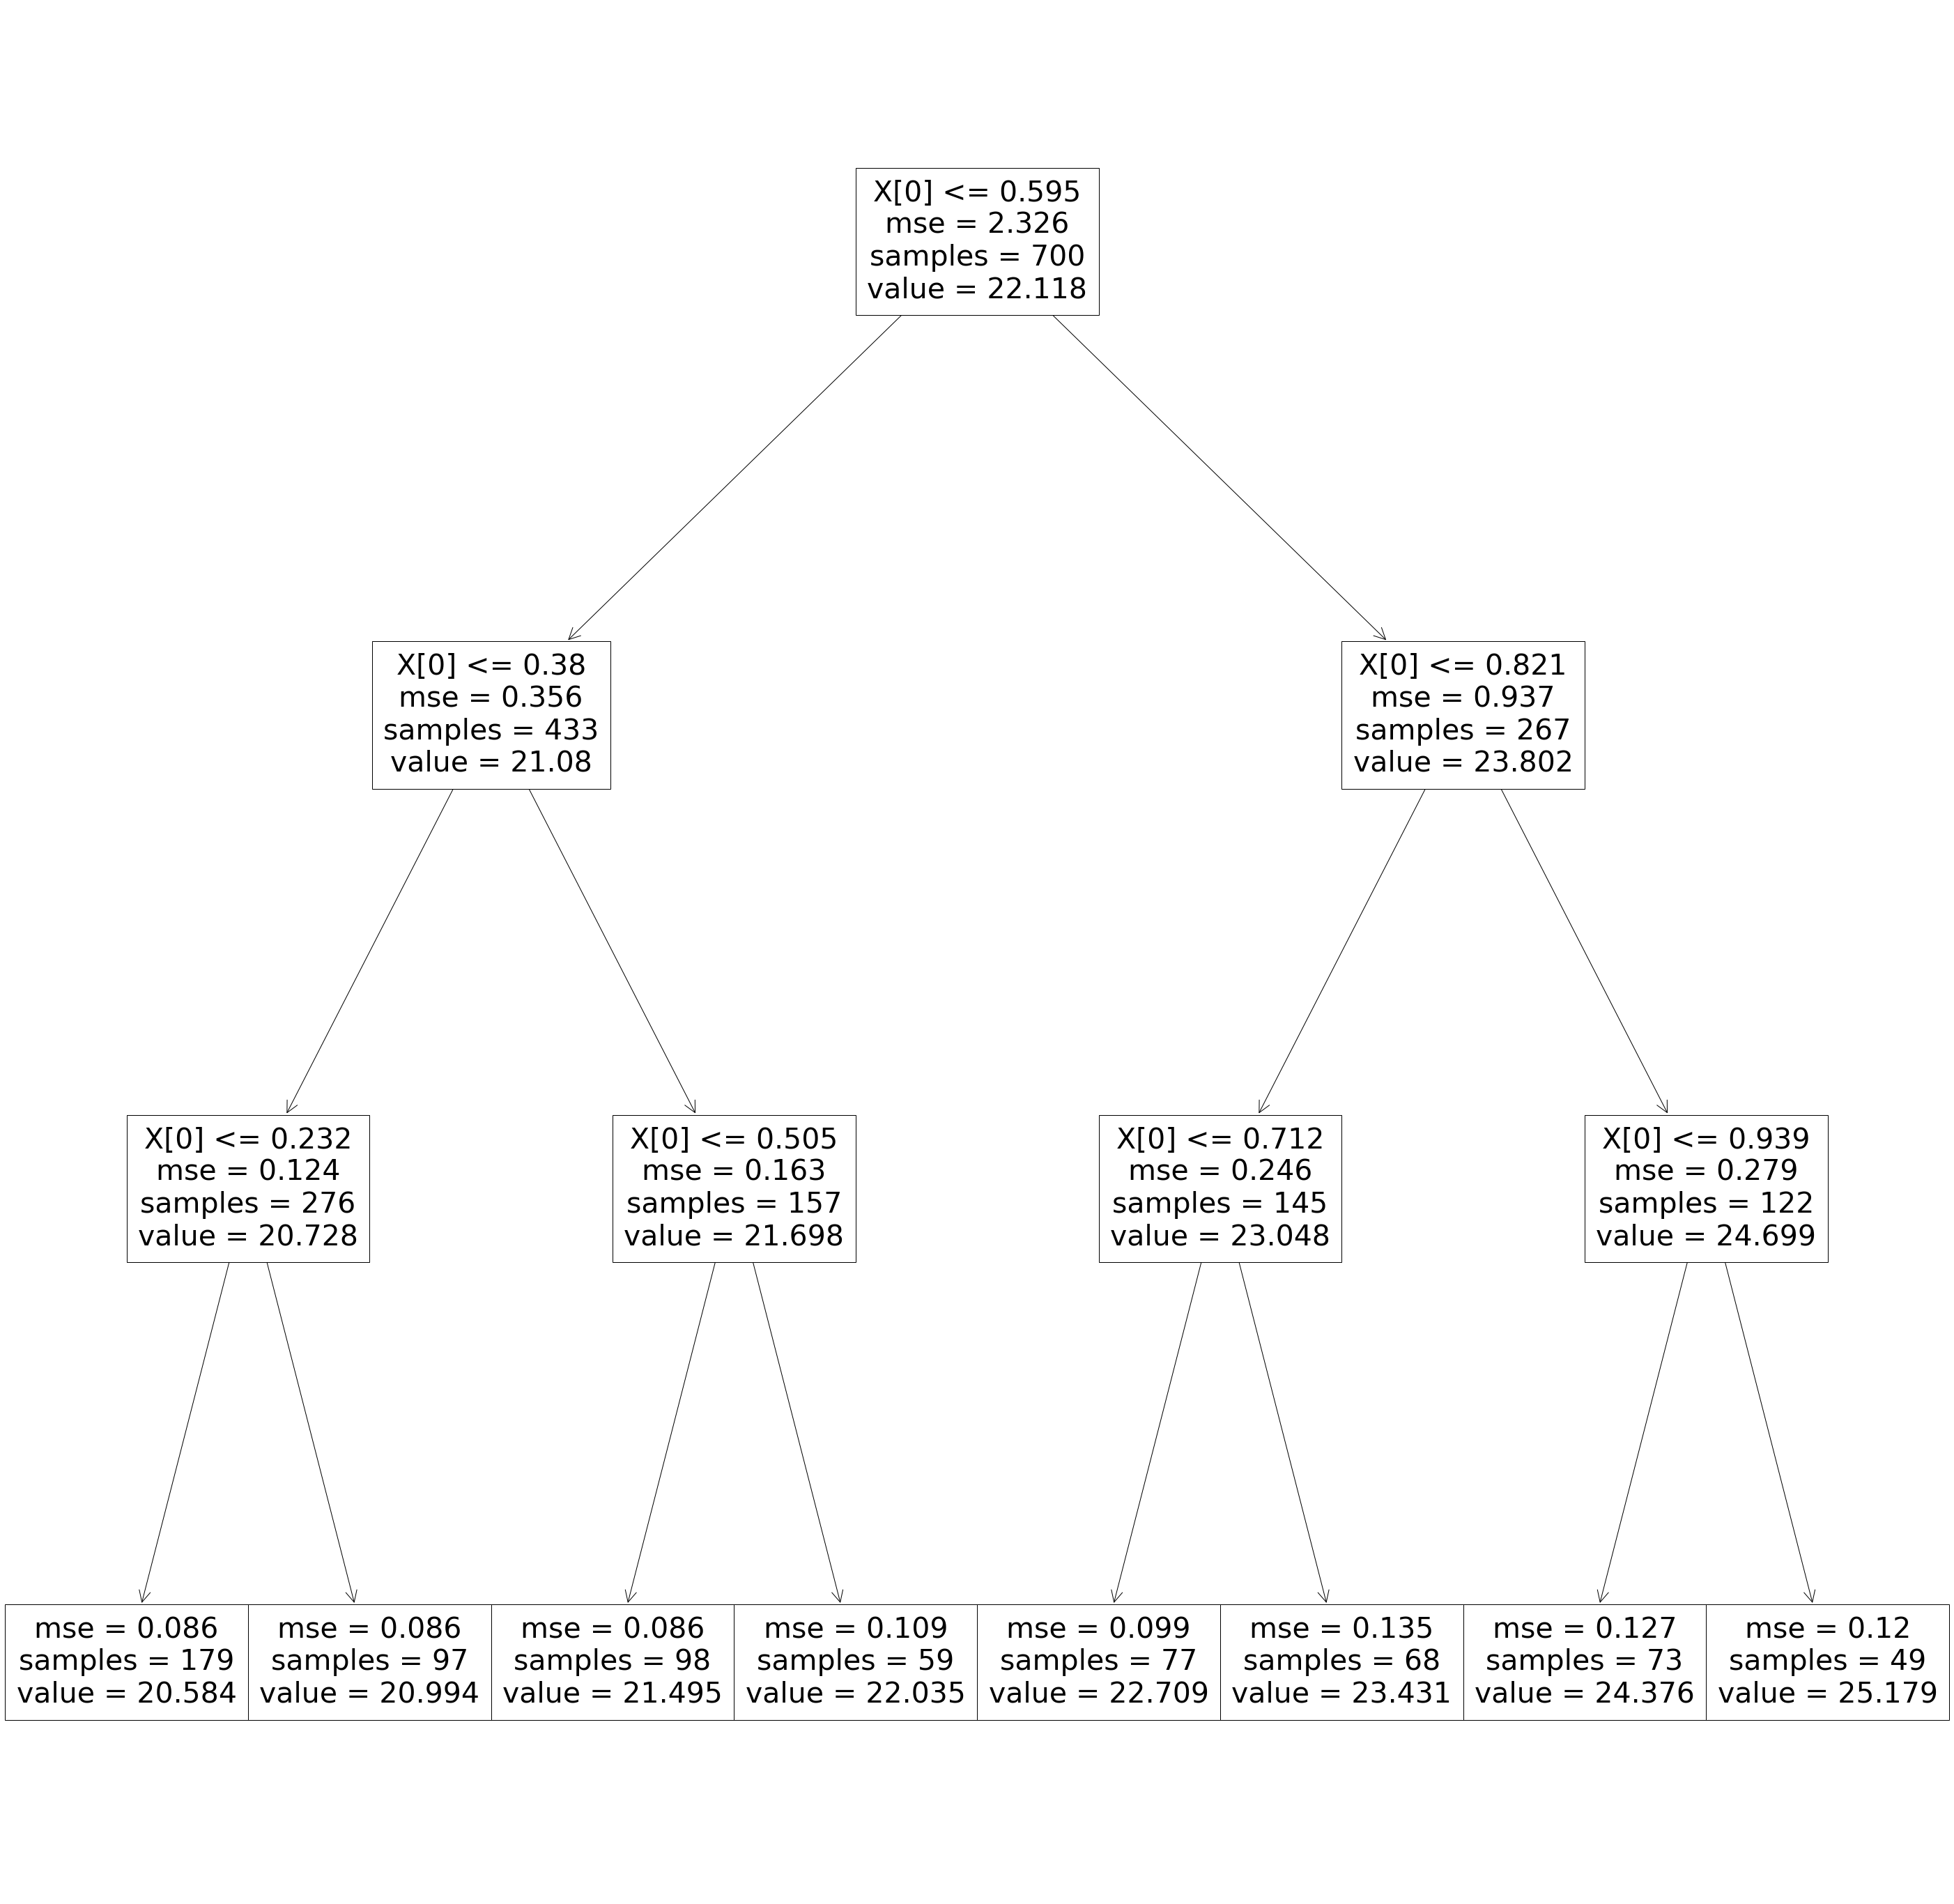

In [459]:
plt.figure(figsize=(50,50))
tree.plot_tree(tree_ex);
plt.show()

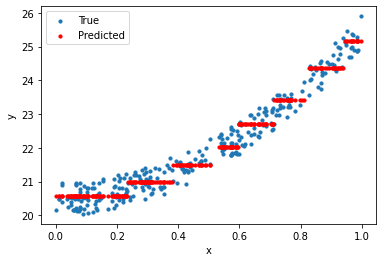

In [460]:
plt.scatter(X_test, Y_test, s=10, label='True')
plt.scatter(X_test, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 來點實際的資料吧

In [476]:
boston = datasets.load_boston() 

In [477]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [478]:
boston["data"]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [479]:
boston["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [480]:
boston["target"]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [481]:
X = pd.DataFrame(boston["data"],columns=boston["feature_names"])

In [482]:
Y = pd.DataFrame(boston["target"],columns=["target"])

In [483]:
boston_data = pd.concat([X,Y],axis=1)

In [484]:
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [535]:
X_train,X_test,Y_train,Y_test = train_test_split(boston_data[boston["feature_names"]],boston_data[["target"]],test_size=0.3)

In [536]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
320,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4.0,411.0,18.3,392.33,7.79
410,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
156,2.44668,0.0,19.58,0.0,0.871,5.272,94.0,1.7364,5.0,403.0,14.7,88.63,16.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.11504,0.0,2.89,0.0,0.445,6.163,69.6,3.4952,2.0,276.0,18.0,391.83,11.34
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77
338,0.03306,0.0,5.19,0.0,0.515,6.059,37.3,4.8122,5.0,224.0,20.2,396.14,8.51
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33


In [487]:
Y_train

,target
159,23.3
63,25.0
476,16.7
59,19.6
355,20.6
...,...
454,14.9
161,50.0
371,50.0
152,15.3


In [520]:
tree_ex = DecisionTreeRegressor(max_depth=4,min_samples_leaf=10)

In [521]:
tree_ex.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10)

In [522]:
predicted = tree_ex.predict(X_test)

In [523]:
predicted

array([35.30555556, 15.11666667, 24.1       , 24.1       , 20.93209877,
       20.93209877, 15.11666667, 24.1       , 41.        , 33.42      ,
       24.1       , 20.93209877, 20.93209877, 15.11666667, 15.11666667,
       20.93209877, 20.93209877, 20.93209877, 24.1       , 24.1       ,
       18.2       , 19.47272727, 15.11666667, 24.1       , 24.1       ,
       20.93209877, 20.93209877, 18.2       , 31.14705882, 35.30555556,
       20.93209877, 24.1       , 20.93209877, 19.47272727, 10.85526316,
       24.1       , 20.93209877, 20.93209877, 15.75      , 24.1       ,
       24.1       , 48.2       , 24.1       , 15.11666667, 20.93209877,
       19.47272727, 35.30555556, 20.93209877, 31.14705882, 35.30555556,
       19.47272727, 20.93209877, 33.42      , 35.30555556, 15.11666667,
       10.85526316, 18.2       , 31.14705882, 20.93209877, 19.47272727,
       24.1       , 24.1       , 20.93209877, 24.1       , 20.93209877,
       20.93209877, 19.47272727, 15.11666667, 20.93209877, 15.11

In [524]:
Y_test.values

array([[33.3],
       [17. ],
       [20.5],
       [24.5],
       [16.1],
       [20.6],
       [15.4],
       [31.5],
       [46.7],
       [50. ],
       [20.4],
       [19.1],
       [19.5],
       [14.1],
       [15.6],
       [21.4],
       [16.8],
       [21.2],
       [22.9],
       [35.1],
       [18.7],
       [19.8],
       [15.6],
       [23.3],
       [24.1],
       [19.6],
       [23.2],
       [22.2],
       [34.6],
       [23.6],
       [10.9],
       [23.4],
       [16.6],
       [21.5],
       [13.4],
       [21.2],
       [22.8],
       [21.4],
       [20. ],
       [23.2],
       [23.1],
       [43.5],
       [28.4],
       [15.6],
       [20.1],
       [17.3],
       [32.7],
       [21.4],
       [10.4],
       [36.2],
       [19.4],
       [22.7],
       [41.3],
       [31.7],
       [15.1],
       [17.8],
       [19.4],
       [17.8],
       [20.1],
       [17.8],
       [24.4],
       [25. ],
       [23. ],
       [25. ],
       [19.2],
       [24.7],
       [20

In [525]:
tree_ex.score(X_test,Y_test["target"])

0.7723445949611443

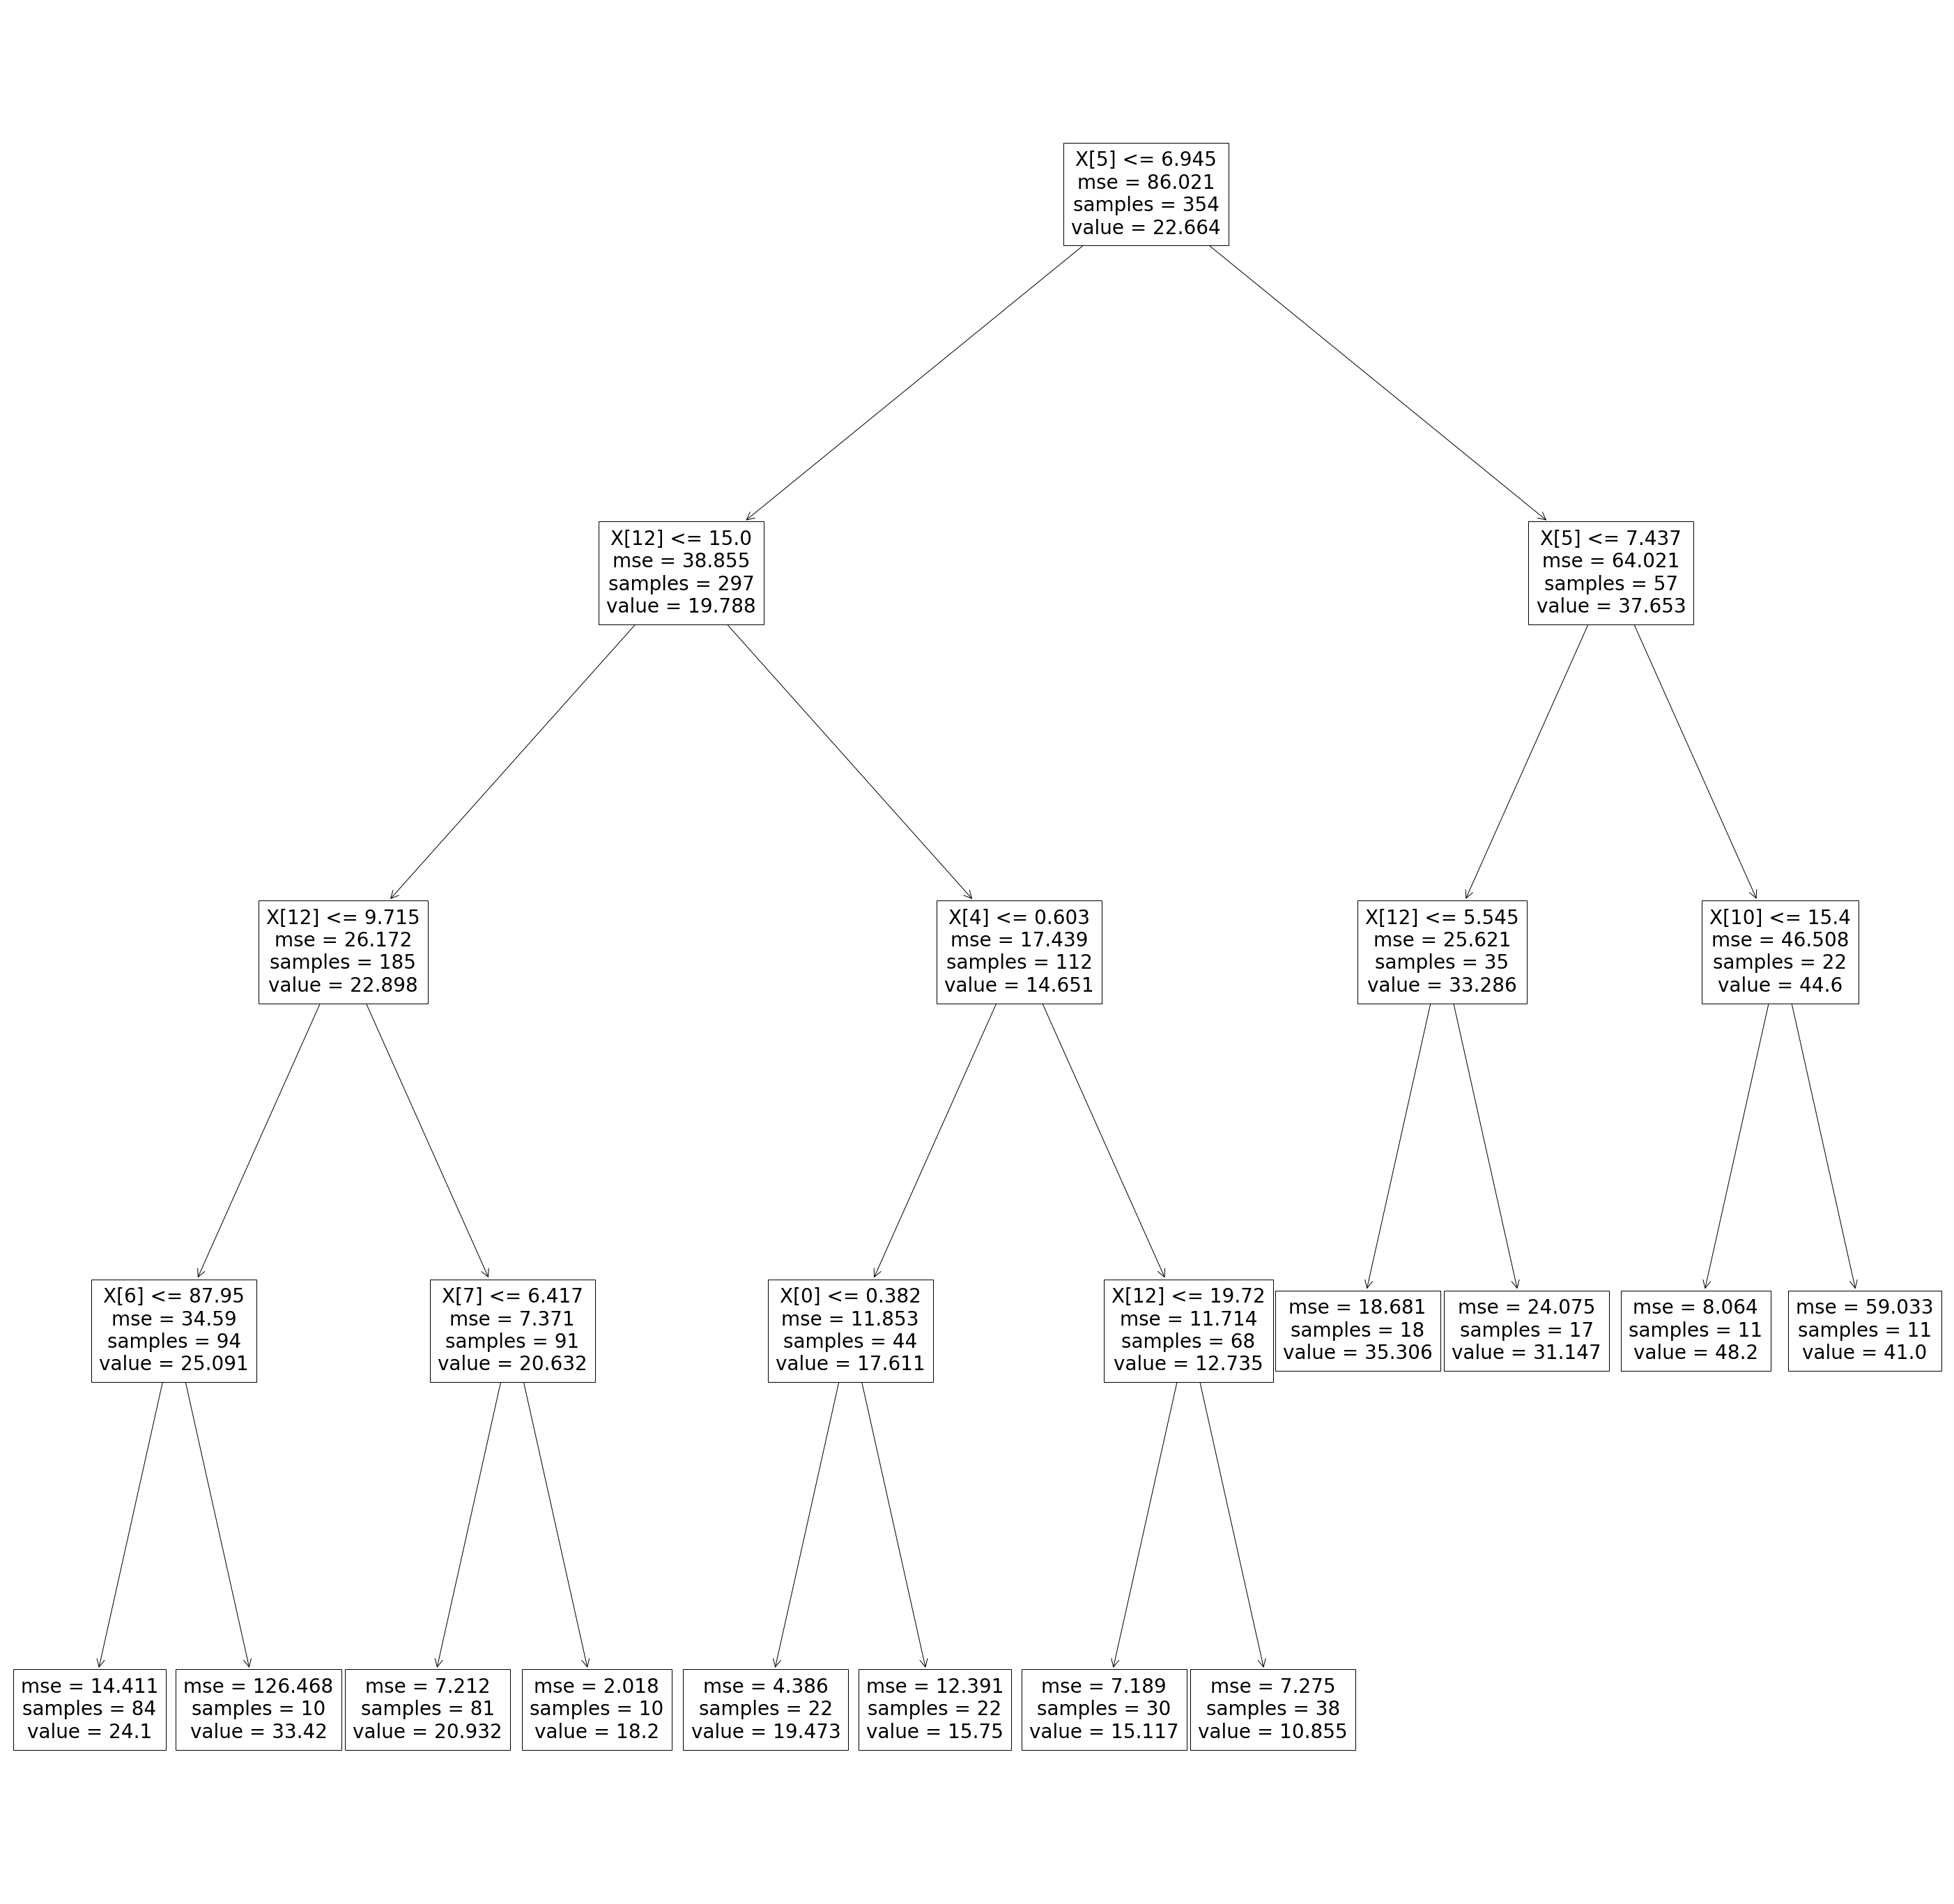

In [526]:
plt.figure(figsize=(50,50))
tree.plot_tree(tree_ex);
plt.show()

# Q2: 用datasets裡面的diabetes來做做看迴歸決策樹，其中target是y，其他是x。（結果不會太好，所以不用太執著於結果好壞，試試看做就好了。）

In [537]:
diabetes = datasets.load_diabetes()

In [538]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59